## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [2]:
data = pd.read_csv('train.csv')

In [3]:
# Menampilkan 10 baris pertama data secara acak
data.sample(10)

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
75676,556430400,1987-08-20 04:00:00+00:00,28800,29.72 C,NaN,24.36,35.06 C,28.75 C,30.8 C,1011.0hPa,undetermined,undetermined,73,2.89m/s,194.0°,0.18,NaN,no-snow,NaN,33
249875,1183546800,2007-07-04 11:00:00+00:00,28800,27.64 C,NaN,129.07 Celcius,32.48,27.23,28.51 C,1011,undetermined,undetermined,89,1.3 m/s,208.0°,0mm,NaN,0mm,0,76
102554,653191200,1990-09-13 02:00:00+00:00,28800,29.07 Celcius,NaN,23.73 C,33.46,28.43,29.9 C,1011,undetermined,NaN,73,2.25,176.0 °,0.23,0,0,0,90
143878,801957600,1995-05-31 22:00:00+00:00,28800,25.76 C,NaN,24.9,26.87,25.17 C,26.3,1011,undetermined,undetermined,95,0.94 m/s,175,0,0,NaN,no_snow,100
71775,542386800,1987-03-10 15:00:00+00:00,28800,24.87 C,unknown,23.84 C,25.87,24.11,25.67 C,1011,NaN,undetermined,94,1.55m/s,26,,0,0,0,98.00%
71704,542131200,1987-03-07 16:00:00+00:00,28800,24.75 C,-1m,24.24 °C,129.82,23.97,25.69 Celcius,1011,NaN,NaN,97,1.67,44.0°,0,NaN,NaN,0,32
254249,1199293200,2008-01-02 17:00:00+00:00,28800,25.42,NaN,24.91 °C,26.55,24.92,26.46 C,1009,NaN,NaN,97,1.03,262.0°,0,0mm,0,NaN,97
132653,761547600,1994-02-18 05:00:00+00:00,28800,29.46 C,NaN,24.34,34.63,28.76,30.23 Celcius,1009,NaN,undetermined,74,0.66,320.0 °,0.12 mm,NaN,0,0,99
215990,1061560800,2003-08-22 14:00:00+00:00,28800,25.06 Celcius,NaN,24.03 C,26.08,24.54,25.86,1013,NaN,NaN,94.00%,1.6,210.0°,0,NaN,0,0,81
129655,750754800,1993-10-16 07:00:00+00:00,28800,29.49 C,NaN,24.14 C,34.48°C,28.77 C,30.48,1010,NaN,undetermined,73,1.08 m/s,165.0 °,0,NaN,0,0,93


In [4]:
# Melihat info dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   datetime      341880 non-null  int64 
 1   datetime_iso  341880 non-null  object
 2   time-zone     341880 non-null  int64 
 3   temp          341880 non-null  object
 4   visibility    51112 non-null   object
 5   d_point       341880 non-null  object
 6   feels         341880 non-null  object
 7   min_temp      341880 non-null  object
 8   max_temp      341880 non-null  object
 9   prssr         341880 non-null  object
 10  sea_level     192964 non-null  object
 11  grnd_level    192919 non-null  object
 12  hum           341880 non-null  object
 13  wind_spd      341880 non-null  object
 14  wind_deg      341880 non-null  object
 15  rain_1h       341880 non-null  object
 16  rain_3h       192329 non-null  object
 17  snow_1h       192696 non-null  object
 18  snow_3h       192699 non

## Data formatting 

In [5]:
# Fungsi untuk mencari karakter unik yang hanya selain angka
def find_non_numeric_unique_chars(column):
    non_numeric_chars = set("".join(data[column].astype(str)).replace(" ", ""))
    numeric_chars = set("0123456789")
    unique_non_numeric_chars = non_numeric_chars - numeric_chars
    return unique_non_numeric_chars

# Loop melalui semua kolom
for column in data.columns:
    # Periksa apakah kolom memiliki tipe data objek (string)
    if data[column].dtype == 'object':
        # Cetak karakter unik yang hanya selain angka
        unique_non_numeric_chars = find_non_numeric_unique_chars(column)
        print(f"Karakter unik (selain angka) dalam kolom '{column}': {unique_non_numeric_chars}")

Karakter unik (selain angka) dalam kolom 'datetime_iso': {'+', ':', '-'}
Karakter unik (selain angka) dalam kolom 'temp': {'°', 'l', 'u', 's', 'C', 'i', '.', 'c', 'e'}
Karakter unik (selain angka) dalam kolom 'visibility': {'w', 'u', 'r', 'a', 's', 'g', 'p', 'y', 'z', 'k', '-', 'f', 'd', 'n', 'm', 'e', 'i', 't', 'c', 'o'}
Karakter unik (selain angka) dalam kolom 'd_point': {'°', 'l', 'u', 's', 'C', 'i', '.', 'c', 'e'}
Karakter unik (selain angka) dalam kolom 'feels': {'°', 'l', 'u', 's', 'C', 'c', 'i', '.', 'e'}
Karakter unik (selain angka) dalam kolom 'min_temp': {'°', 'l', 'u', 's', 'C', 'i', '.', 'c', 'e'}
Karakter unik (selain angka) dalam kolom 'max_temp': {'°', 'l', 'u', 's', 'C', 'i', '.', 'c', 'e'}
Karakter unik (selain angka) dalam kolom 'prssr': {'h', 'a', 'P', '.'}
Karakter unik (selain angka) dalam kolom 'sea_level': {'l', 'u', 'r', 'b', 'k', 'o', 'a', 'f', 'i', 't', 'n', 'c', 'e', 'w', 'h', 's', 'm', '_', 'p', '-', 'd'}
Karakter unik (selain angka) dalam kolom 'grnd_level'

In [6]:
# Kolom-kolom yang perlu diekstraksi
columns_to_extract = ['temp', 'visibility', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'sea_level', 'grnd_level', 'hum', 'wind_spd', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds']

# Loop for untuk melakukan ekstraksi dan konversi
for column in columns_to_extract:
    data[column] = data[column].str.extract('([\d.]+)').astype(float)

## Handling Missing Value

In [7]:
# Menghitung jumlah missing values tiap kolom dalam bentuk presentase
missing_values = data.isnull().sum()

total_rows = data.shape[0]
missing_percentage = (missing_values / total_rows) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

              Missing Values  Percentage
datetime                   0    0.000000
datetime_iso               0    0.000000
time-zone                  0    0.000000
temp                       0    0.000000
visibility            320499   93.746051
d_point                    0    0.000000
feels                      0    0.000000
min_temp                   0    0.000000
max_temp                   0    0.000000
prssr                      0    0.000000
sea_level             336990   98.569674
grnd_level            336369   98.388031
hum                        0    0.000000
wind_spd                   0    0.000000
wind_deg                   0    0.000000
rain_1h                26598    7.779923
rain_3h               186654   54.596350
snow_1h               175398   51.303966
snow_3h               178868   52.318942
clouds                     0    0.000000


In [8]:
# Menentukan threshold persentase missing value
threshold = 60  # Threshold 60%

# Hapus kolom yang memiliki missing value lebih dari threshold
columns_to_drop = data.columns[data.isnull().mean() * 100 > threshold]
data.drop(columns=columns_to_drop, inplace=True)

# Isi missing value dalam kolom 'rain_1h' dengan mean dari kolom tersebut
mean_rain_1h = data['rain_1h'].mean()
data['rain_1h'].fillna(mean_rain_1h, inplace=True)

In [9]:
# Menghitung jumlah missing values tiap kolom
missing_values = data.isnull().sum()

# Menghitung persentase missing values tiap kolom
total_rows = data.shape[0]
missing_percentage = (missing_values / total_rows) * 100

# Menampilkan jumlah dan persentase missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

              Missing Values  Percentage
datetime                   0    0.000000
datetime_iso               0    0.000000
time-zone                  0    0.000000
temp                       0    0.000000
d_point                    0    0.000000
feels                      0    0.000000
min_temp                   0    0.000000
max_temp                   0    0.000000
prssr                      0    0.000000
hum                        0    0.000000
wind_spd                   0    0.000000
wind_deg                   0    0.000000
rain_1h                    0    0.000000
rain_3h               186654   54.596350
snow_1h               175398   51.303966
snow_3h               178868   52.318942
clouds                     0    0.000000


## Invalid Data

In [10]:
data.drop('rain_3h', axis=1, inplace=True)
data.drop('snow_1h', axis=1, inplace=True)
data.drop('snow_3h', axis=1, inplace=True)
data.drop('datetime', axis=1, inplace=True)
data.drop('time-zone', axis=1, inplace=True)

## Feature Engineering

In [11]:
# Konversi kolom "datetime_iso" menjadi tipe data datetime
data['datetime_iso'] = pd.to_datetime(data['datetime_iso'])
# Ekstrak tahun (year)
data['year'] = data['datetime_iso'].dt.year
# Ekstrak bulan (month)
data['month'] = data['datetime_iso'].dt.month
# Ekstrak hari (day)
data['day'] = data['datetime_iso'].dt.day

data.drop('datetime_iso', axis=1, inplace=True)

In [12]:
data.sample(10)

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds,year,month,day
209188,31.30,25.88,38.30,30.09,32.17,1008.0,73.0,0.93,84.0,0.00,90.0,2002,11,12
338871,125.95,24.36,26.11,24.42,27.32,1010.0,96.0,1.41,185.0,0.00,90.0,2017,8,28
81706,25.68,24.64,26.76,24.99,26.35,1007.0,94.0,0.80,0.0,0.88,99.0,1988,4,27
92050,25.81,24.23,26.82,24.94,26.61,1008.0,91.0,0.72,237.0,0.83,95.0,1989,7,2
307969,25.12,23.91,26.12,24.55,28.02,1013.0,93.0,1.79,7.0,0.00,100.0,2014,2,18
268319,26.26,25.39,26.26,25.61,27.04,1011.0,95.0,1.37,311.0,0.00,98.0,2009,8,10
222096,25.64,24.78,26.74,24.95,26.18,1009.0,95.0,1.12,343.0,0.27,93.0,2004,5,3
107287,28.31,25.34,33.60,27.86,28.52,1008.0,84.0,2.16,41.0,2.82,91.0,1991,3,29
65671,30.72,25.09,37.44,29.39,32.14,1008.0,72.0,5.94,155.0,1.26,73.0,1986,6,29
29222,24.77,24.26,25.84,24.10,25.81,1013.0,97.0,0.63,287.0,0.54,100.0,1982,5,2


## Data Exploration

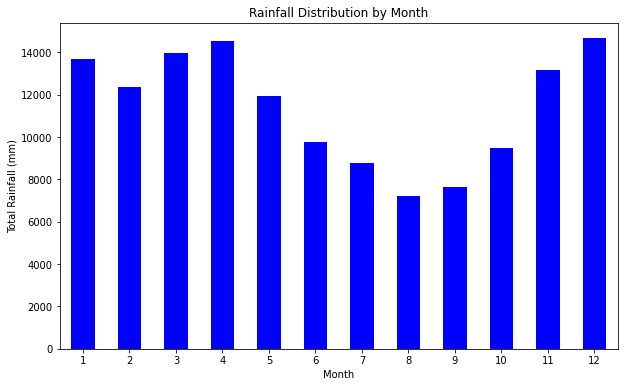

In [13]:
monthly_rainfall = data.groupby('month')['rain_1h'].sum()

plt.figure(figsize=(10, 6)) 
monthly_rainfall.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.title('Rainfall Distribution by Month')
plt.xticks(rotation=0)
plt.show()

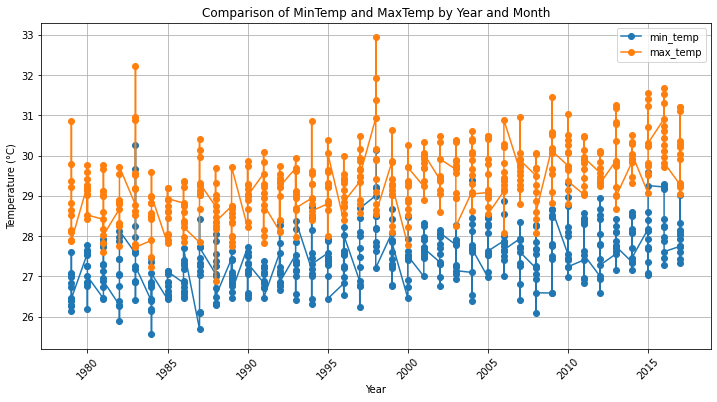

In [14]:
temp_comparison = data.groupby(['year', 'month'])[['min_temp', 'max_temp']].mean()

temp_comparison = temp_comparison.reset_index()

plt.figure(figsize=(12, 6))

plt.plot(temp_comparison['year'], temp_comparison['min_temp'], label='min_temp', marker='o')
plt.plot(temp_comparison['year'], temp_comparison['max_temp'], label='max_temp', marker='o')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Comparison of MinTemp and MaxTemp by Year and Month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

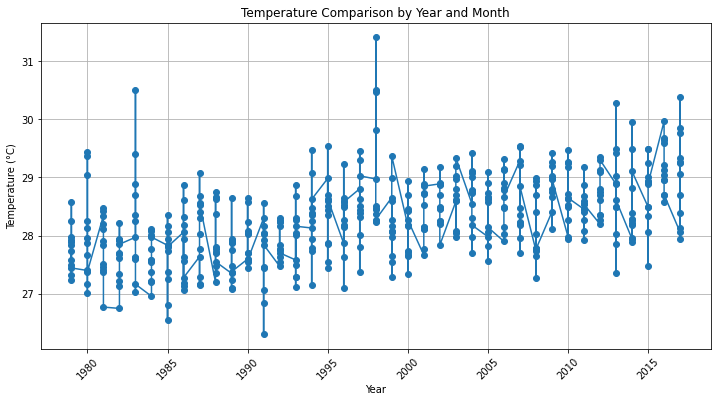

In [15]:
# Group the data by year and month, and calculate the average temperature for each group
temp_comparison = data.groupby(['year', 'month'])['temp'].mean()

# Reset the index to make 'year' and 'month' columns accessible for plotting
temp_comparison = temp_comparison.reset_index()

# Create a line plot to compare temperature based on year and month
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.plot(temp_comparison['year'], temp_comparison['temp'], marker='o')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Comparison by Year and Month')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [16]:
# # Kolom-kolom yang ingin diplot
# columns_to_plot = ['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'rain_1h', 'clouds']

# # Membuat subplot dengan ukuran yang sesuai
# fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# # Plot distribusi untuk tiap kolom
# for i, column in enumerate(columns_to_plot):
#     sns.histplot(data[column], ax=axes[i], kde=True)
#     axes[i].set_title(f'Distribution of {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Frequency')

# plt.tight_layout()
# plt.show()

## Handling Outlier

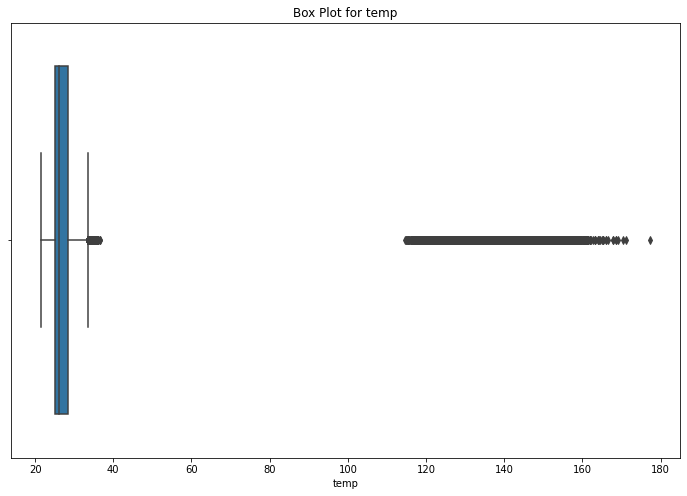

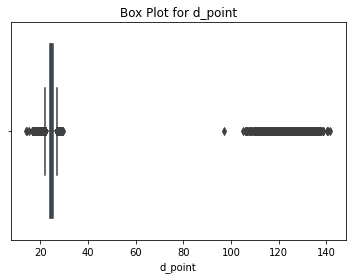

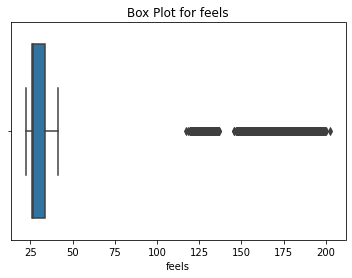

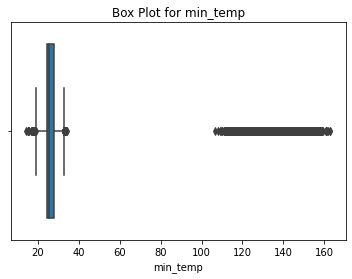

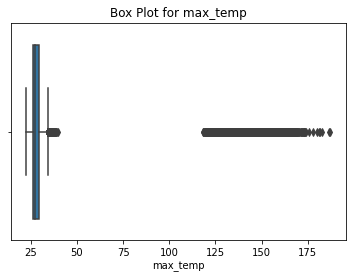

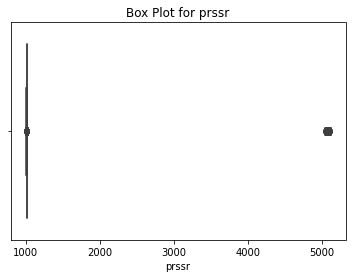

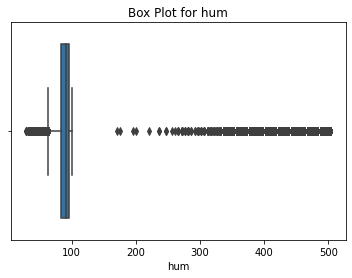

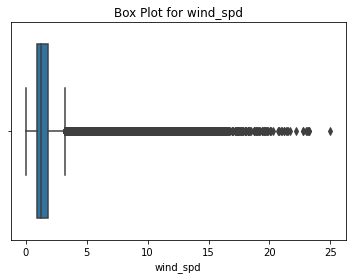

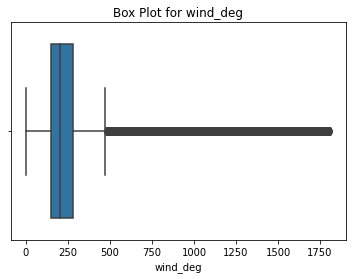

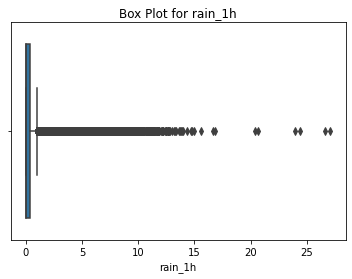

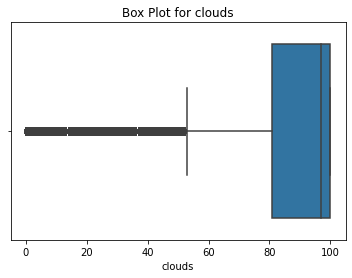

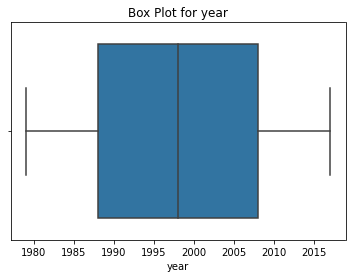

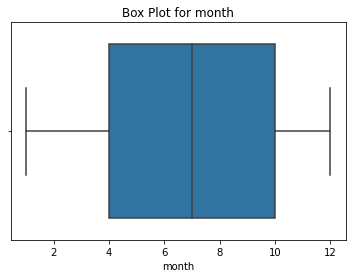

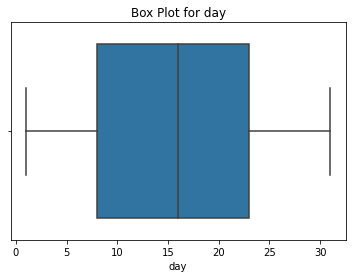

In [17]:
# Create box plots for each column in the DataFrame
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Iterate through each column
for column in data.columns:
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [18]:
# Detecting outliers with IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

temp          3.410000
d_point       1.290000
feels         7.380000
min_temp      3.390000
max_temp      3.340000
prssr         2.000000
hum          13.000000
wind_spd      0.920000
wind_deg    130.000000
rain_1h       0.401359
clouds       19.000000
year         20.000000
month         6.000000
day          15.000000
dtype: float64


In [19]:
data.shape
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(223109, 14)

## Data Distribution

c:\Aplikasi\Anaconda\envs\gpu2\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


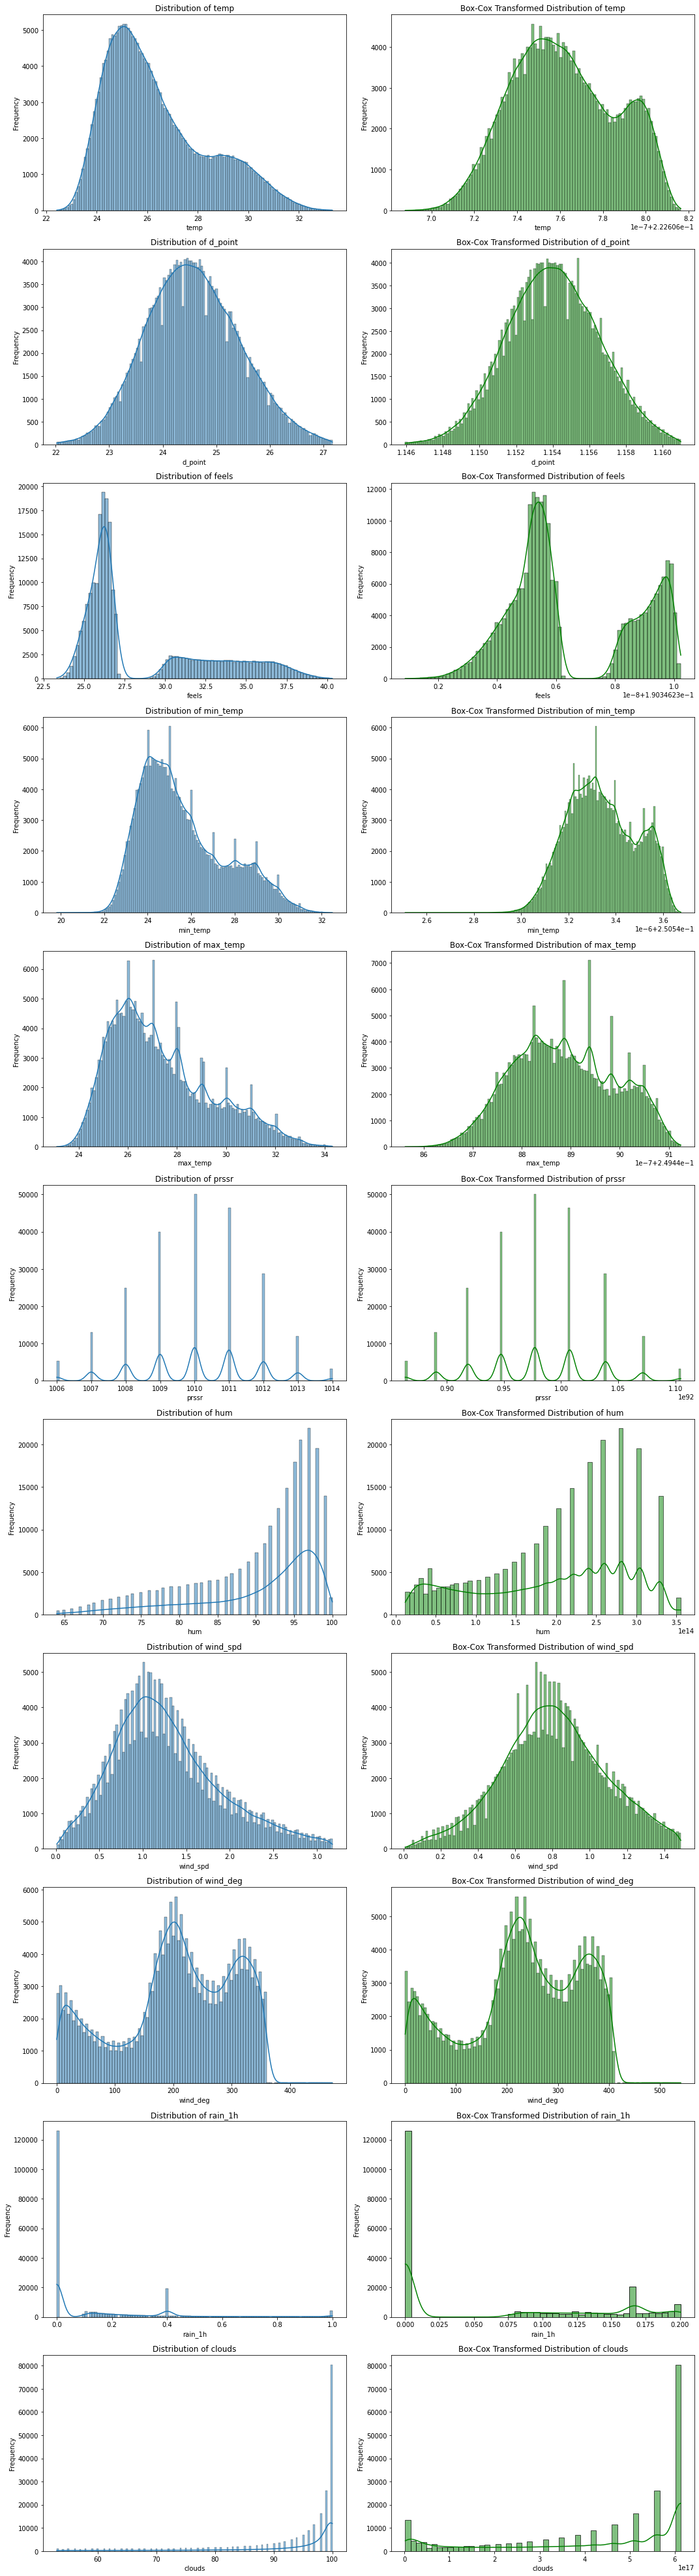

In [20]:
from scipy import stats

columns_to_plot = ['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'rain_1h', 'clouds']

# Membuat subplot dengan ukuran yang sesuai
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(15, 5 * len(columns_to_plot)))

# Plot distribusi awal untuk tiap kolom
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Melakukan transformasi Box-Cox
    transformed_data, _ = stats.boxcox(data[column].dropna() + 1)  # Menambahkan 1 untuk menghindari nilai 0
    sns.histplot(transformed_data, ax=axes[i, 1], kde=True, color='g')
    axes[i, 1].set_title(f'Box-Cox Transformed Distribution of {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<AxesSubplot:>

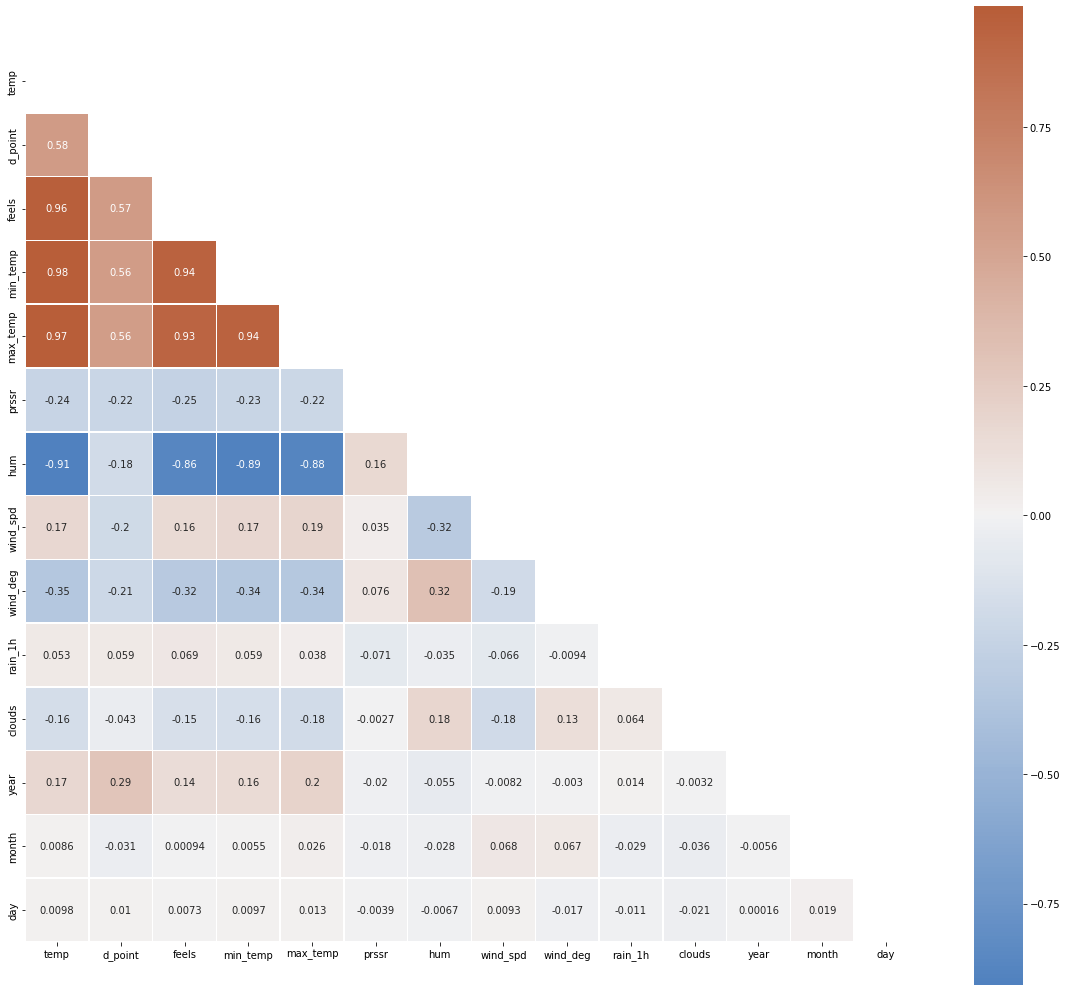

: 

In [21]:
# Correlation Heatmap
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

## Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor
import smogn

# Pisahkan fitur dan target
X = data.drop(['rain_1h', 'year', 'month', 'day'], axis=1)
y = data['rain_1h']

smogn = smogn.smoter(
    data = data,
    y = 'rain_1h'
)

# # Latih model RandomForest
# model = RandomForestRegressor()
# model.fit(X, y)

# # Dapatkan feature importance
# feature_importance = model.feature_importances_
# feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
# sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)
# print(sorted_feature_importance)

IndexError: positional indexers are out-of-bounds

## Data Modelling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [25]:
# Pisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Lakukan pra-pemrosesan data, misalnya penskalaan fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Latih model RandomForest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model dengan RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

RMSE: 0.25
MAE: 0.19


In [27]:
from sklearn.tree import DecisionTreeRegressor

# Create a list of regression models
models = [
    DecisionTreeRegressor(random_state=42),
]

for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Print the results
    print(f'Model: {model.__class__.__name__}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print('-' * 30)


Model: DecisionTreeRegressor
RMSE: 0.35
MAE: 0.23
------------------------------


## Prediction on Test data

In [28]:
test_data = pd.read_csv('test.csv')

In [29]:
# Kolom-kolom yang perlu diekstraksi dan dikonversi
columns_to_extract = ['temp', 'visibility', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'sea_level', 'grnd_level', 'hum', 'wind_spd', 'wind_deg', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds']

for column in columns_to_extract:
    test_data[column] = test_data[column].str.extract('([\d.]+)').astype(float)

In [30]:
# Lakukan ekstraksi tanggal, bulan, dan tahun pada kolom 'datetime_iso'
test_data['datetime_iso'] = pd.to_datetime(test_data['datetime_iso'])
test_data['year'] = test_data['datetime_iso'].dt.year
test_data['month'] = test_data['datetime_iso'].dt.month
test_data['day'] = test_data['datetime_iso'].dt.day

In [31]:
test_data.fillna(0, inplace=True)

In [32]:
X_test = scaler.transform(test_data[['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'clouds']])

In [33]:
predictions = model.predict(X_test)

In [34]:
submission = pd.DataFrame({
    'datetime_iso': test_data['datetime_iso'],
    'rain_1h': predictions
})

submission.to_csv('sample_submission.csv', index=False)